<a href="https://colab.research.google.com/github/ArnoldoOliva/DeepL_clase/blob/main/Prediccion_redes_neuronales_series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#PASO 0. INSTALACION DE LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from numpy import array


from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


In [2]:
serieP=array([10,25,23,14,25,23,14,85,14,36])
print(serieP)

def DescomponerSerie(serie,longitud):
    global X, y
    X, y=list(), list()
    for i in range(len(serie)):
        final=i+longitud
        if final > len(serie)-1:
            break
        historia_x, target_y=serie[i:final], serie[final]
        X.append(historia_x)
        y.append(target_y)
    return array(X), array(y)


DescomponerSerie(serieP,3)


[10 25 23 14 25 23 14 85 14 36]


(array([[10, 25, 23],
        [25, 23, 14],
        [23, 14, 25],
        [14, 25, 23],
        [25, 23, 14],
        [23, 14, 85],
        [14, 85, 14]]),
 array([14, 25, 23, 14, 85, 14, 36]))

In [3]:
for i in range(len(X)):
    print(X[i], y[i])

[10 25 23] 14
[25 23 14] 25
[23 14 25] 23
[14 25 23] 14
[25 23 14] 85
[23 14 85] 14
[14 85 14] 36


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#PASO 1. LEER LA BASE DE DATOS
inf = pd.read_csv("/content/INP_INP20230603145451.CSV",usecols=[0, 1], skiprows=range(1, 14), encoding='latin-1')

inf.rename(columns={"Instituto Nacional de Estadística y Geografía":"Fecha","Unnamed: 1":"inpc"},inplace=True)
#PP['Fecha'] = pd.to_datetime(PP['Fecha'], infer_datetime_format=True)
inf.head()

,Fecha,inpc
0,Ene 2000,1.34
1,Feb 2000,0.89
2,Mar 2000,0.55
3,Abr 2000,0.57
4,May 2000,0.37


<Axes: xlabel='Fecha'>

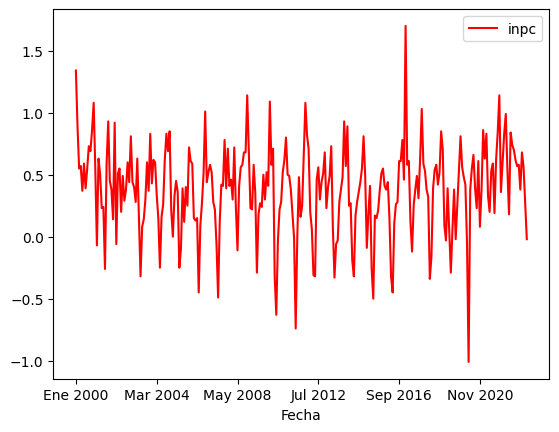

In [7]:

inf.plot(x="Fecha", y="inpc",color="red")

In [26]:
seq = list(inf["inpc"])
print(seq)


[1.34, 0.89, 0.55, 0.57, 0.37, 0.59, 0.39, 0.55, 0.73, 0.69, 0.86, 1.08, 0.55, -0.07, 0.63, 0.5, 0.23, 0.24, -0.26, 0.59, 0.93, 0.45, 0.38, 0.14, 0.92, -0.06, 0.51, 0.55, 0.2, 0.49, 0.29, 0.38, 0.6, 0.44, 0.81, 0.44, 0.4, 0.28, 0.63, 0.17, -0.32, 0.08, 0.14, 0.3, 0.6, 0.37, 0.83, 0.43, 0.62, 0.6, 0.34, 0.15, -0.25, 0.16, 0.26, 0.62, 0.83, 0.69, 0.85, 0.21, 0.0, 0.33, 0.45, 0.36, -0.25, -0.1, 0.39, 0.12, 0.4, 0.25, 0.72, 0.61, 0.59, 0.15, 0.13, 0.15, -0.45, 0.09, 0.27, 0.51, 1.01, 0.44, 0.52, 0.58, 0.52, 0.28, 0.22, -0.06, -0.49, 0.12, 0.42, 0.41, 0.78, 0.39, 0.71, 0.41, 0.46, 0.3, 0.72, 0.23, -0.11, 0.41, 0.56, 0.58, 0.68, 0.68, 1.14, 0.69, 0.23, 0.22, 0.58, 0.35, -0.29, 0.18, 0.27, 0.24, 0.5, 0.3, 0.52, 0.41, 1.09, 0.58, 0.71, -0.32, -0.63, -0.03, 0.22, 0.28, 0.52, 0.62, 0.8, 0.5, 0.49, 0.38, 0.19, -0.01, -0.74, 0.0, 0.48, 0.16, 0.25, 0.67, 1.08, 0.82, 0.71, 0.2, 0.06, -0.31, -0.32, 0.46, 0.56, 0.3, 0.44, 0.51, 0.68, 0.23, 0.4, 0.49, 0.73, 0.07, -0.33, -0.06, -0.03, 0.28, 0.38, 0.48, 

In [27]:
X,y=DescomponerSerie(seq,20)


In [28]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=20))
model.add(Dense(5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['accuracy'])

In [29]:
#TRAIN THE MODEL
model.fit(X, y, epochs=10, batch_size=10)

#PREDICCIONES`
print("Generate predictions for 3 samples")
predictions = model.predict(X)
print("predictions shape:", predictions)


Epoch 1/10
26/26 [==============================] - 0s 1ms/step - loss: 0.2792 - accuracy: 0.0077
Epoch 2/10
26/26 [==============================] - 0s 997us/step - loss: 0.1641 - accuracy: 0.0077
Epoch 3/10
26/26 [==============================] - 0s 987us/step - loss: 0.1438 - accuracy: 0.0077
Epoch 4/10
26/26 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.0077
Epoch 5/10
26/26 [==============================] - 0s 988us/step - loss: 0.1235 - accuracy: 0.0077
Epoch 6/10
26/26 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.0077
Epoch 7/10
26/26 [==============================] - 0s 989us/step - loss: 0.1153 - accuracy: 0.0077
Epoch 8/10
26/26 [==============================] - 0s 1ms/step - loss: 0.1130 - accuracy: 0.0077
Epoch 9/10
26/26 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.0077
Epoch 10/10
26/26 [==============================] - 0s 962us/step - loss: 0.1092 - accuracy: 0.0077
Generate 

In [30]:
Predictions=pd.DataFrame(predictions)
Predictions.columns = ["Predictions"]
Predictions.head()


,Predictions
0,0.225018
1,0.311450
2,0.589602
3,0.373654
4,0.273409


In [31]:
RealPredictions=pd.concat([inf,Predictions],axis=1)
RealPredictions=pd.DataFrame(RealPredictions)
RealPredictions.head()

,Fecha,inpc,Predictions
0,Ene 2000,1.34,0.225018
1,Feb 2000,0.89,0.311450
2,Mar 2000,0.55,0.589602
3,Abr 2000,0.57,0.373654
4,May 2000,0.37,0.273409


<Axes: >

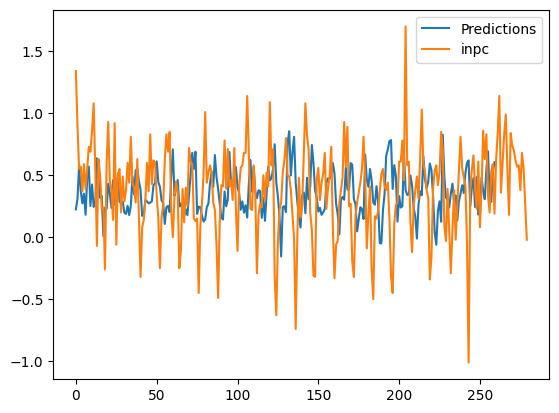

In [32]:
RealPredictions.plot(y=['Predictions','inpc'])

In [40]:
# demonstrate prediction

import random
x_inputl=[]
for e in range(20):
  x_input = array( [random.uniform(0, 10) for _ in range(20)] )
  x_input = x_input.reshape((1, 20))
  x_inputl.append(x_input)
  yhat = model.predict(x_input, verbose=0)
  print(yhat)

[[-0.16635743]]
[[0.8890749]]
[[0.1064454]]
[[3.173777]]
[[0.8680781]]
[[6.004243]]
[[0.03136167]]
[[1.6585332]]
[[2.8249335]]
[[-0.42644253]]
[[2.2792926]]
[[0.13591155]]
[[1.113608]]
[[0.3558291]]
[[-0.24699011]]
[[4.1298747]]
[[1.8631822]]
[[4.0994163]]
[[4.15]]
[[2.8060832]]


In [34]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y, predictions)
print("MAE:", mae)

MAE: 0.2525330788848492


In [ ]:
##########
# Modelo 2

In [35]:
n=20
hidden_neurons= (4*n**2 + 3) / (n**2-8)
hidden_neurons  #4 

4.089285714285714

In [36]:
model2 = Sequential()
model2.add(Dense(4, activation='relu', input_dim=20)) #solo 1 hidden layer de 4 neuronas
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='SGD', metrics=['accuracy'])

In [ ]:
#TRAIN THE MODEL
model2.fit(X, y, epochs=10, batch_size=10)

#PREDICCIONES`
print("Generate predictions for 3 samples")
predictions2 = model2.predict(X)
print("predictions shape:", predictions2)


In [42]:
for e in range(len(x_inputl)):
  yhat2 = model2.predict(x_inputl[e], verbose=0)
  print(yhat2)

[[-2.5169694]]
[[2.7688248]]
[[0.3167831]]
[[0.5000251]]
[[1.4159817]]
[[-0.18529543]]
[[0.3167831]]
[[0.8085749]]
[[0.3167831]]
[[0.3167831]]
[[0.3167831]]
[[-0.6985159]]
[[-4.083275]]
[[-3.6073267]]
[[0.3167831]]
[[-4.3688707]]
[[-1.1170949]]
[[-1.5913063]]
[[-1.1115128]]
[[-0.94726825]]


In [43]:
mae2 = mean_absolute_error(y, predictions2)
print("MAE:", mae2)

MAE: 0.25917614382046916
